<a href="https://colab.research.google.com/github/MrSimple07/Big_Data_Technologies/blob/main/kinopoisk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title
import requests
import json

headers = {"X-API-KEY": "8HHYKCA-9HSM14K-HVDN8A1-Q2EKFRE"}

def save_all_movies():

    all_movies = []

    response = requests.get(
        'https://api.kinopoisk.dev/v1.4/movie',
        params={
            "limit": 50,
            "page": 1,
        },
        headers=headers
    )
    movies = response.json()
    total_pages = movies["total"] // movies["limit"] + (1 if movies["total"] % movies["limit"] > 0 else 0)

    for page in range(1, total_pages + 1):
        response = requests.get(
            'https://api.kinopoisk.dev/v1.4/movie',
            params={
                "genres.name": genres,
                "limit": 50,
                "page": page,
                "year": year_range
            },
            headers=headers
        )
        movies = response.json()
        all_movies.extend(movies["docs"])

    with open('movies.json', 'w') as f:
        json.dump(all_movies, f, ensure_ascii=False, indent=4)
save_all_movies()


KeyError: 'docs'

# 1. Data Loading and overall information

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd

movies_df = pd.read_json('/content/all_movies.json')

In [ ]:
# @title
movies_df.head()

,id,name,alternativeName,enName,names,type,typeNumber,year,description,shortDescription,...,poster,backdrop,genres,countries,top10,top250,isSeries,ticketsOnSale,logo,releaseYears
0,1318972,Гнев человеческий,Wrath of Man,None,"[{'name': 'Гнев человеческий', 'language': 'RU...",movie,1,2021,Грузовики лос-анджелесской инкассаторской комп...,"Хмурый мужчина прикидывается инкассатором, что...",...,{'url': 'https://image.openmoviedb.com/kinopoi...,{'url': 'https://image.openmoviedb.com/kinopoi...,"[{'name': 'боевик'}, {'name': 'триллер'}]","[{'name': 'Великобритания'}, {'name': 'США'}]",NaN,NaN,False,False,NaN,NaN
1,927898,Переводчик,The Covenant,None,"[{'name': 'Переводчик', 'language': 'RU', 'typ...",movie,1,2022,"Афганистан, март 2018 года. Во время спецопера...","Ахмед спас Джона от смерти, и теперь тот долже...",...,{'url': 'https://image.openmoviedb.com/kinopoi...,{'url': 'https://image.openmoviedb.com/kinopoi...,"[{'name': 'боевик'}, {'name': 'триллер'}, {'na...","[{'name': 'Великобритания'}, {'name': 'Испания...",NaN,198.0,False,False,NaN,NaN
2,409424,Дюна,Dune: Part One,None,"[{'name': 'Дюна'}, {'name': 'Dune: Part One'},...",movie,1,2021,Наследник знаменитого дома Атрейдесов Пол отпр...,"Атрейдесы прибывают на планету, где им никто н...",...,{'url': 'https://image.openmoviedb.com/kinopoi...,{'url': 'https://image.openmoviedb.com/kinopoi...,"[{'name': 'фантастика'}, {'name': 'боевик'}, {...","[{'name': 'США'}, {'name': 'Канада'}, {'name':...",NaN,NaN,False,False,{'url': 'https://avatars.mds.yandex.net/get-ot...,NaN
3,1405508,Операция «Фортуна»: Искусство побеждать,Operation Fortune: Ruse de Guerre,None,[{'name': 'Операция «Фортуна»: Искусство побеж...,movie,1,2022,Суперагент британской разведки Орсон Форчун на...,Команда шпионов пытается сорвать продажу супер...,...,{'url': 'https://image.openmoviedb.com/kinopoi...,{'url': 'https://image.openmoviedb.com/kinopoi...,"[{'name': 'боевик'}, {'name': 'комедия'}]","[{'name': 'Великобритания'}, {'name': 'США'}]",NaN,NaN,False,False,NaN,NaN
4,1199100,Главный герой,Free Guy,None,"[{'name': 'Главный герой'}, {'name': 'Free Guy...",movie,1,2021,Парень по имени Парень счастлив. Он живет в лу...,"Банковский клерк обнаруживает, что он персонаж...",...,{'url': 'https://image.openmoviedb.com/kinopoi...,{'url': 'https://image.openmoviedb.com/kinopoi...,"[{'name': 'фантастика'}, {'name': 'боевик'}, {...","[{'name': 'США'}, {'name': 'Канада'}]",NaN,NaN,False,False,{'url': 'https://avatars.mds.yandex.net/get-ot...,NaN


In [ ]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7806 entries, 0 to 7805
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7806 non-null   int64  
 1   name               2724 non-null   object 
 2   alternativeName    7677 non-null   object 
 3   enName             171 non-null    object 
 4   names              7802 non-null   object 
 5   type               7806 non-null   object 
 6   typeNumber         7806 non-null   int64  
 7   year               7806 non-null   int64  
 8   description        1935 non-null   object 
 9   shortDescription   440 non-null    object 
 10  status             1332 non-null   object 
 11  rating             7806 non-null   object 
 12  votes              7806 non-null   object 
 13  movieLength        4056 non-null   float64
 14  totalSeriesLength  175 non-null    float64
 15  seriesLength       892 non-null    float64
 16  ratingMpaa         414 n

In [ ]:
movies_df.describe()

,id,typeNumber,year,movieLength,totalSeriesLength,seriesLength,ageRating,top10,top250
count,7.806000e+03,7806.000000,7806.000000,4056.000000,175.000000,892.000000,777.000000,1.0,16.000000
mean,3.416267e+06,1.453241,2021.222777,80.430966,250.880000,36.604260,16.658945,5.0,107.812500
std,1.756439e+06,0.976497,1.034918,49.687330,255.636129,22.863556,2.987651,NaN,74.736175
min,8.062000e+03,1.000000,2020.000000,1.000000,3.000000,1.000000,0.000000,5.0,14.000000
25%,1.371653e+06,1.000000,2020.000000,29.750000,48.000000,23.000000,16.000000,5.0,44.500000
50%,4.483635e+06,1.000000,2021.000000,90.000000,270.000000,30.000000,18.000000,5.0,81.000000
75%,4.948907e+06,1.000000,2022.000000,112.000000,300.000000,45.000000,18.000000,5.0,168.000000
max,5.505876e+06,5.000000,2023.000000,480.000000,2208.000000,178.000000,18.000000,5.0,231.000000


In [ ]:
movies_df.shape

(7806, 28)

# 2. Data Cleaning

- Handle missing values: Identify and handle any missing values in the dataset.

- Data type conversion: Check and convert data types if necessary (e.g., converting release years to datetime format).

In [ ]:
movies_df.isnull().sum()

id                      0
name                 5082
alternativeName       129
enName               7635
names                   4
type                    0
typeNumber              0
year                    0
description          5871
shortDescription     7366
status               6474
rating                  0
votes                   0
movieLength          3750
totalSeriesLength    7631
seriesLength         6914
ratingMpaa           7392
ageRating            7029
poster                  5
backdrop                8
genres                  0
countries               2
top10                7805
top250               7790
isSeries                0
ticketsOnSale           0
logo                 1888
releaseYears         4908
dtype: int64

1. Handling missing values. We can drop the columns with more than 70% missing value as they cannot affect to the analysis.


2. ReleaseYears: Convert the "releaseYears" column to datetime format if it contains dates or years.

In [ ]:
missing_percentage = (movies_df.isnull().sum() / len(movies_df)) * 100
columns_to_drop = missing_percentage[missing_percentage > 70].index

movies_df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
print(movies_df.columns)

Index(['id', 'name', 'alternativeName', 'names', 'type', 'typeNumber', 'year',
       'rating', 'votes', 'movieLength', 'poster', 'backdrop', 'genres',
       'countries', 'isSeries', 'ticketsOnSale', 'logo', 'releaseYears',
       'first_country'],
      dtype='object')


In [ ]:
movies_df.shape

(7806, 18)

In [ ]:
print(movies_df.isnull().sum())

id                    0
name               5082
alternativeName     129
names                 4
type                  0
typeNumber            0
year                  0
rating                0
votes                 0
movieLength        3750
poster                5
backdrop              8
genres                0
countries             2
isSeries              0
ticketsOnSale         0
logo               1888
releaseYears       4908
dtype: int64


In [ ]:
# Fill missing values in textual columns with "Unknown"
movies_df['name'].fillna('Unknown', inplace=True)
movies_df['alternativeName'].fillna('Unknown', inplace=True)

# Fill missing values in numerical columns with the median
movies_df['movieLength'].fillna(movies_df['movieLength'].median(), inplace=True)

# Fill missing values in URL columns with "Not available"
movies_df['poster'].fillna('Not available', inplace=True)
movies_df['backdrop'].fillna('Not available', inplace=True)
movies_df['logo'].fillna('Not available', inplace=True)

# Fill missing values in releaseYears with 0
movies_df['releaseYears'].fillna(0, inplace=True)

# Check if all missing values are handled
print(movies_df.isnull().sum())

id                 0
name               0
alternativeName    0
names              4
type               0
typeNumber         0
year               0
rating             0
votes              0
movieLength        0
poster             0
backdrop           0
genres             0
countries          2
isSeries           0
ticketsOnSale      0
logo               0
releaseYears       0
dtype: int64


# 3.  Exploratory Data Analysis (EDA)

1. **Genre Distribution**
   - We'll start by exploring the distribution of movie genres to understand the most popular genres in the dataset.
   - Visualize the genre distribution using bar charts or pie charts.

2. **Country-wise Analysis**
   - Analyze the distribution of movies by country of production to identify the top movie-producing countries.
   - Visualize the distribution of movies across different countries using bar charts or geographical maps.

3. **Movie Length Distribution**
   - Explore the distribution of movie lengths (in minutes) to understand the typical duration of movies in the dataset.
   - Plot histograms or box plots to visualize the distribution of movie lengths.

4. **Rating Analysis**
   - Analyze the distribution of movie ratings to understand the overall rating distribution in the dataset.
   - Calculate descriptive statistics such as mean, median, and mode of movie ratings.

5. **Poster and Backdrop Analysis**
   - Explore the availability of posters and backdrops for movies in the dataset.
   - Analyze the distribution of poster and backdrop URLs to identify any patterns or trends.

6. **Series vs. Movies Analysis**
    - Compare the distribution of movies and TV series in the dataset.
    - Analyze differences in attributes such as movie length, rating, and votes between movies and TV series.


### 1. Genre Distribution

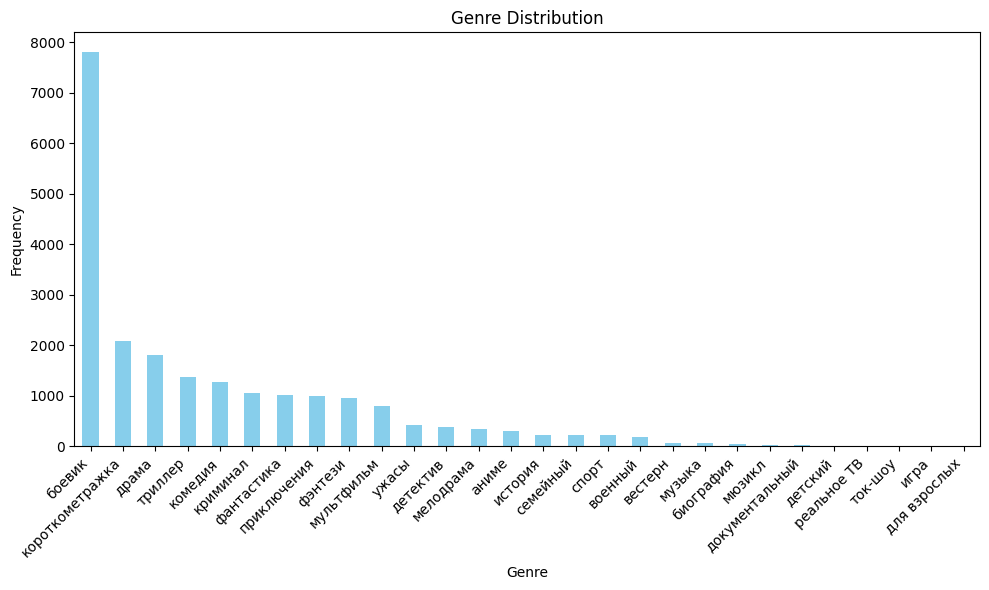

In [ ]:
import matplotlib.pyplot as plt

genres_list = []

for genres in movies_df['genres']:
    for genre in genres:
        genres_list.append(genre['name'])

genre_counts = pd.Series(genres_list).value_counts()

plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 2. Country Analysis

In [ ]:
movies_df['countries']

0           [{'name': 'Великобритания'}, {'name': 'США'}]
1       [{'name': 'Великобритания'}, {'name': 'Испания...
2       [{'name': 'США'}, {'name': 'Канада'}, {'name':...
3           [{'name': 'Великобритания'}, {'name': 'США'}]
4                   [{'name': 'США'}, {'name': 'Канада'}]
                              ...                        
7801                                    [{'name': 'США'}]
7802                                 [{'name': 'Канада'}]
7803                                    [{'name': 'США'}]
7804                               [{'name': 'Бразилия'}]
7805                                    [{'name': 'США'}]
Name: countries, Length: 7806, dtype: object

### 3. Movie Length Distribution

In [ ]:
movies_df.columns

Index(['id', 'name', 'alternativeName', 'enName', 'names', 'type',
       'typeNumber', 'year', 'description', 'shortDescription', 'status',
       'rating', 'votes', 'movieLength', 'totalSeriesLength', 'seriesLength',
       'ratingMpaa', 'ageRating', 'poster', 'backdrop', 'genres', 'countries',
       'top10', 'top250', 'isSeries', 'ticketsOnSale', 'logo', 'releaseYears',
       'first_country'],
      dtype='object')

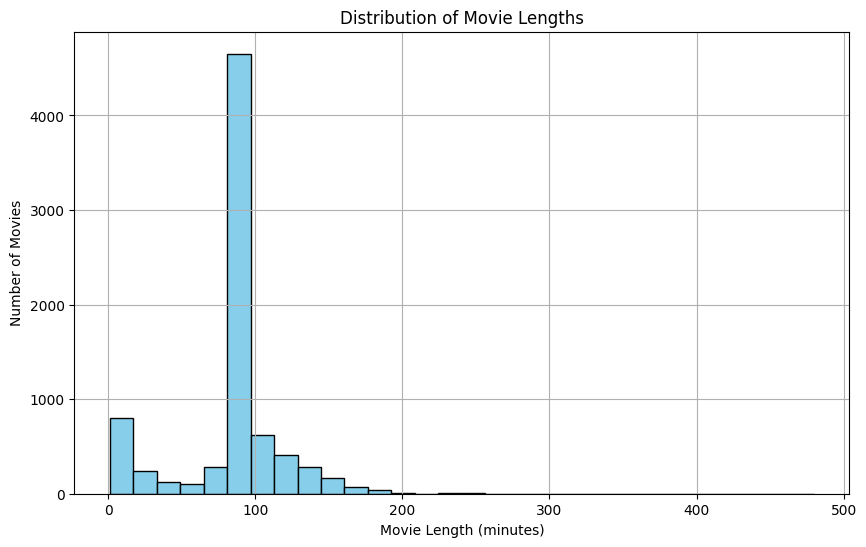

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(movies_df['movieLength'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Movie Lengths')
plt.xlabel('Movie Length (minutes)')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

### 4. Rating analysis

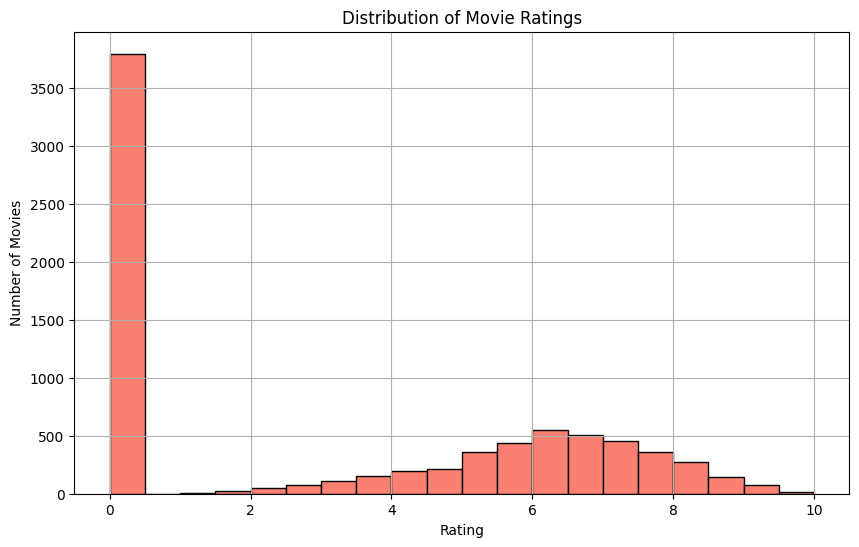

In [ ]:
movies_df['rating'] = movies_df['rating'].apply(lambda x: x.get('imdb') if isinstance(x, dict) else x)

plt.figure(figsize=(10, 6))
plt.hist(movies_df['rating'].dropna(), bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

### 5. Poster and Backdrop Analysis

Number of movies with poster URLs: 7806
Number of movies with backdrop URLs: 7806


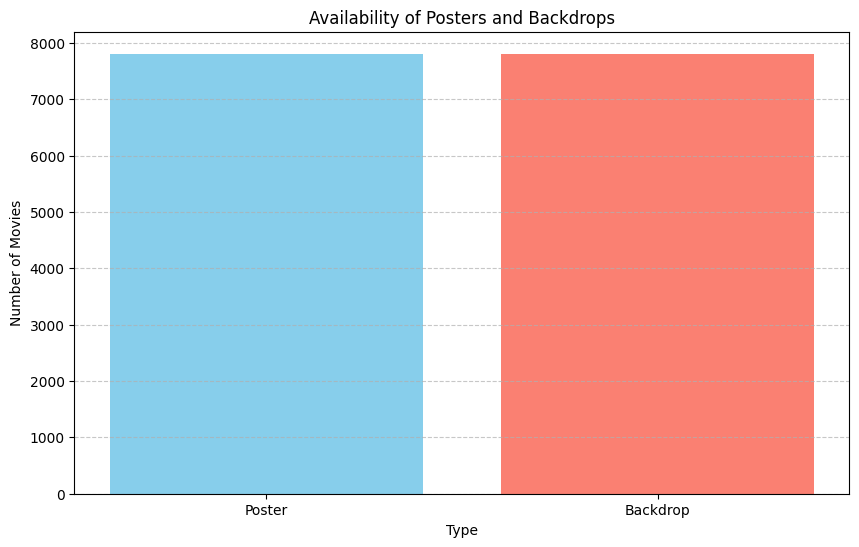

In [ ]:
poster_counts = movies_df['poster'].notna().sum()
backdrop_counts = movies_df['backdrop'].notna().sum()

print("Number of movies with poster URLs:", poster_counts)
print("Number of movies with backdrop URLs:", backdrop_counts)

# Plotting distribution of poster and backdrop availability
plt.figure(figsize=(10, 6))
plt.bar(['Poster', 'Backdrop'], [poster_counts, backdrop_counts], color=['skyblue', 'salmon'])
plt.title('Availability of Posters and Backdrops')
plt.xlabel('Type')
plt.ylabel('Number of Movies')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 6. Series vs. Movies Analysis

Number of movies: 6212
Number of TV series: 1594


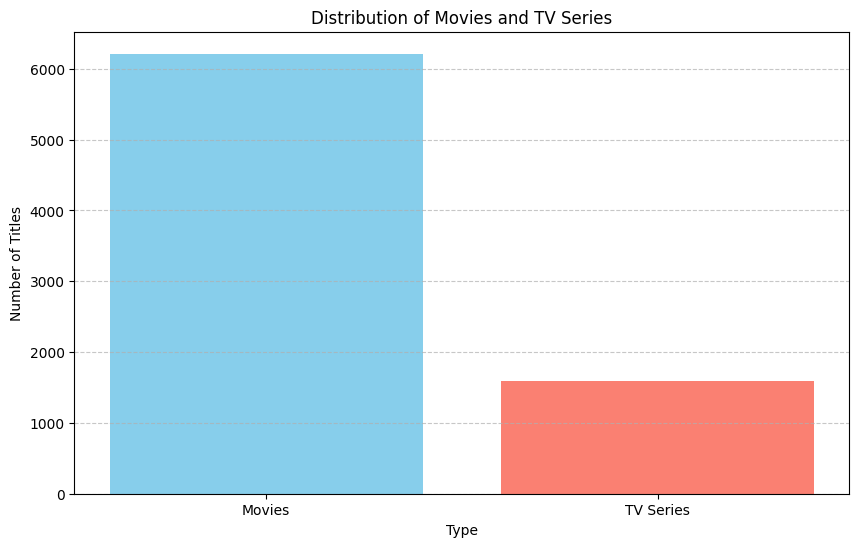

In [ ]:
movies = movies_df[movies_df['isSeries'] == False]
tv_series = movies_df[movies_df['isSeries'] == True]

# Analyze the distribution of movies and TV series
movies_count = len(movies)
tv_series_count = len(tv_series)

# Print the counts
print("Number of movies:", movies_count)
print("Number of TV series:", tv_series_count)

# Plotting distribution of movies and TV series
plt.figure(figsize=(10, 6))
plt.bar(['Movies', 'TV Series'], [movies_count, tv_series_count], color=['skyblue', 'salmon'])
plt.title('Distribution of Movies and TV Series')
plt.xlabel('Type')
plt.ylabel('Number of Titles')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Compare attributes between movies and TV series
movies_stats = movies[['movieLength', 'rating', 'votes']].describe()
tv_series_stats = tv_series[['movieLength', 'rating', 'votes']].describe()

print("\nDescriptive Statistics for Movies:")
print(movies_stats)
print("\nDescriptive Statistics for TV Series:")
print(tv_series_stats)


Descriptive Statistics for Movies:
       movieLength       rating
count  6212.000000  6212.000000
mean     83.752093     2.839713
std      40.405305     3.161815
min       1.000000     0.000000
25%      81.000000     0.000000
50%      90.000000     0.000000
75%      98.000000     5.900000
max     480.000000    10.000000

Descriptive Statistics for TV Series:
       movieLength       rating
count       1594.0  1594.000000
mean          90.0     4.426412
std            0.0     3.445854
min           90.0     0.000000
25%           90.0     0.000000
50%           90.0     6.200000
75%           90.0     7.300000
max           90.0     9.900000


From these statistics, we can conclude that movies have more variability in terms of length and ratings compared to TV series. TV series tend to have a consistent length of 90 minutes and generally higher ratings. However, both movies and TV series can have a wide range of ratings, spanning from 0 to 10 for movies and 0 to 9.9 for TV series.

### Correlation Analysis: Correlations between various attributes such as movie length, rating, and genres.

In [ ]:
movies_df['movieLength'] = pd.to_numeric(movies_df['movieLength'], errors='coerce')
movies_df['rating'] = pd.to_numeric(movies_df['rating'], errors='coerce')
movies_df['genres'] = pd.to_numeric(movies_df['genres'], errors='coerce')

print(movies_df[['movieLength', 'rating', 'votes']].dtypes)


movieLength    float64
rating         float64
votes          float64
dtype: object


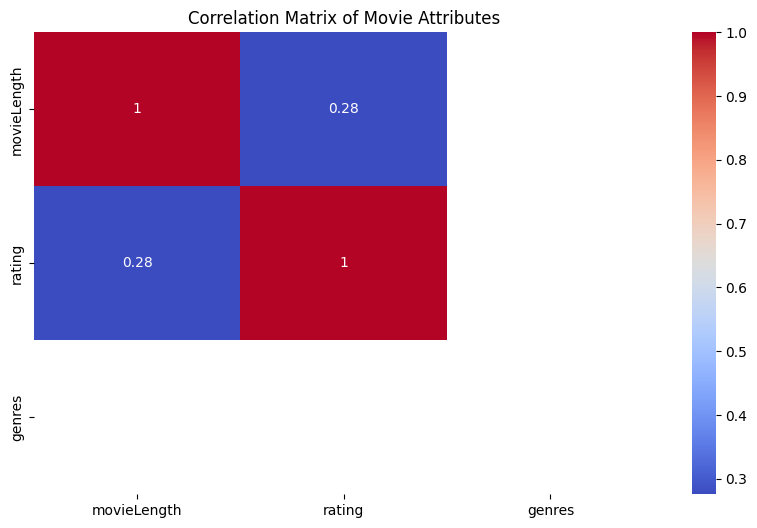

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = ['movieLength', 'rating', 'genres']

# Creating a correlation matrix
correlation_matrix = movies_df[numerical_columns].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Movie Attributes')
plt.show()

### Cluster Analysis: Applying k-means clustering to group similar movies together based on attributes rating and length

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

attributes_for_clustering = ['rating', 'movieLength']
movies_clustering_data = movies_df[['rating', 'movieLength']]

Cluster Centers:
     rating  movieLength
0  0.184498    91.066074
1  6.316931   102.518718
2  1.626943    13.755300


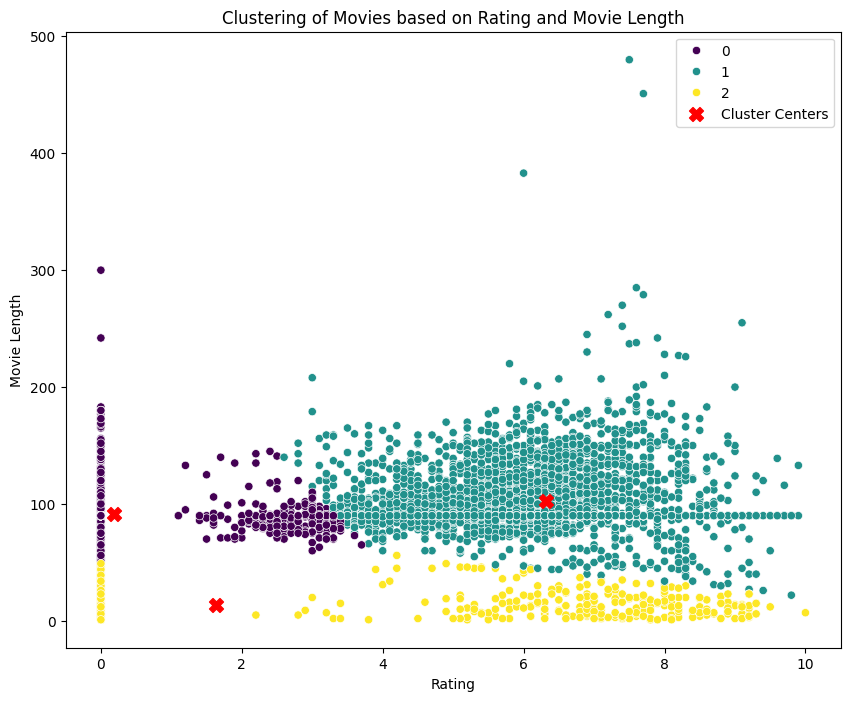

In [ ]:
# Standartization
scaler = StandardScaler()
movies_clustering_data_scaled = scaler.fit_transform(movies_clustering_data)

kmeans = KMeans(n_clusters=3, random_state=42)
movies_df['cluster'] = kmeans.fit_predict(movies_clustering_data_scaled)

cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=['rating', 'movieLength'])
print("Cluster Centers:")
print(cluster_centers_df)

# Visualize the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='rating', y='movieLength', hue='cluster', data=movies_df, palette='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='X', s=100, c='red', label='Cluster Centers')
plt.title('Clustering of Movies based on Rating and Movie Length')
plt.xlabel('Rating')
plt.ylabel('Movie Length')
plt.legend()
plt.show()


The clustering analysis reveals distinct groups of movies based on their ratings and lengths. Cluster 1 represents movies with high ratings and longer lengths, while Cluster 0 and Cluster 2 consist of movies with lower ratings and moderate to short lengths. These clusters provide insights into the diversity of movies in the dataset, allowing for targeted analysis and understanding of different movie types and characteristics.